In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv(r"C:\Users\shres\Desktop\PBL PROJECT\feature engineering\gurgaon_properties_cleaned_v2.csv").drop_duplicates()


In [4]:
df.head()


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up...,2.0,2.0,3,3.0,East,New Property,1361.0,1089.0,705.0,0,0,0,1,0,0,174
1,flat,ramprastha skyz,sector 37d,1.10,6376.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,7.0,East,Undefined,1725.0,NaN,NaN,0,0,0,0,0,0,109
2,flat,signature global solera,sector 107,0.28,5725.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,6.0,West,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45
3,flat,corona optus,sector 37c,1.20,6916.0,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up...,3.0,4.0,3,8.0,South-West,Relatively New,1735.0,1635.0,1535.0,0,0,0,0,0,0,149
4,flat,puri emerald bay,sector 104,2.30,9387.0,2450.0,Super Built up area 2450(227.61 sq.m.),3.0,4.0,3+,10.0,North-East,Moderately Old,2450.0,NaN,NaN,0,1,0,0,0,0,101


In [5]:
df.shape


(3677, 23)

In [6]:
df.columns


Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\4207564571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

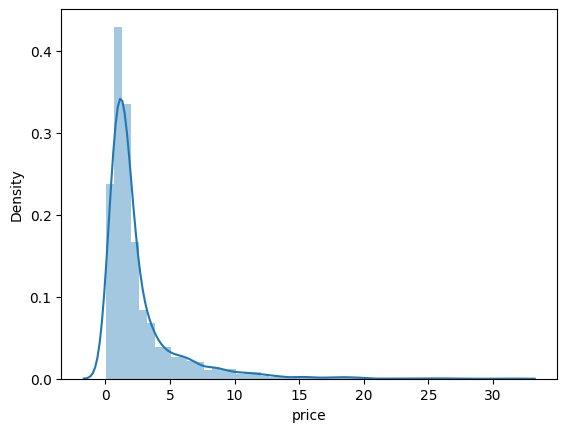

In [7]:
sns.distplot(df['price'])


<Axes: xlabel='price'>

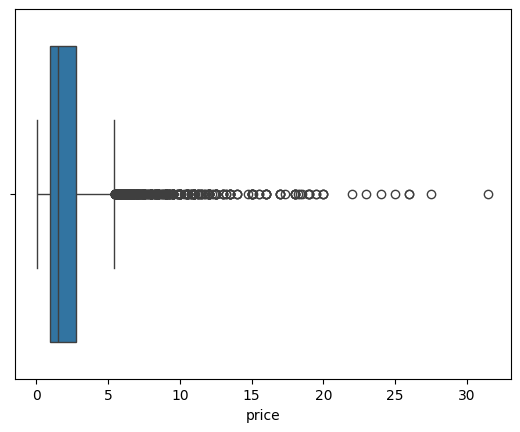

In [8]:
sns.boxplot(x=df['price'])


In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head(20)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2310,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
1600,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
437,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
2834,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
1193,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
2448,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
299,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
404,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
1654,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31
3594,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153


Price_per_sqft


C:\Users\shres\AppData\Local\Temp\ipykernel_28948\2861189070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

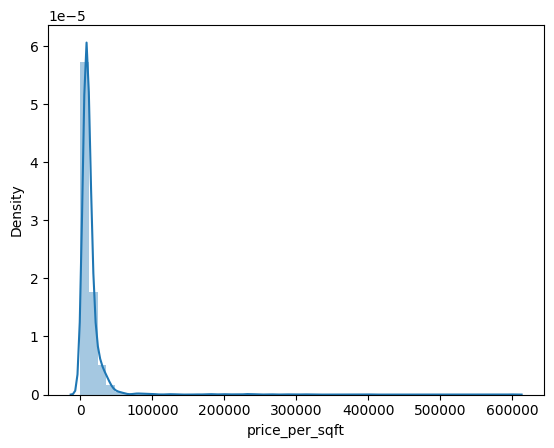

In [11]:
sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft'>

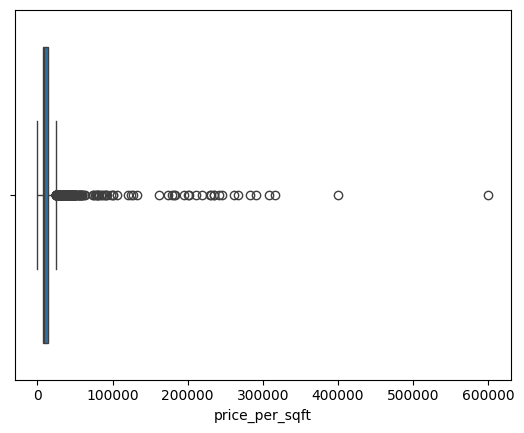

In [12]:
sns.boxplot(x=df['price_per_sqft'])


In [13]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft.loc[:, 'area'] = outliers_sqft['area'].apply(lambda x: x * 9 if x < 1000 else x)


In [17]:
outliers_sqft.loc[:, 'price_per_sqft'] = round((outliers_sqft['price'] * 10_000_000) / outliers_sqft['area'])


In [18]:
outliers_sqft['price_per_sqft'].describe()


count      354.000000
mean     28819.299435
std      13249.775635
min        514.000000
25%      25546.250000
50%      29788.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\2861189070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

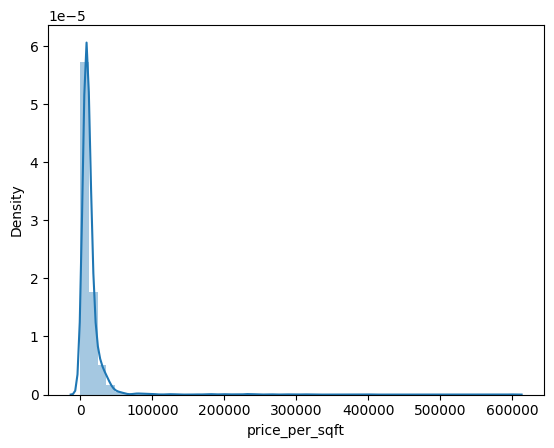

In [19]:
sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft'>

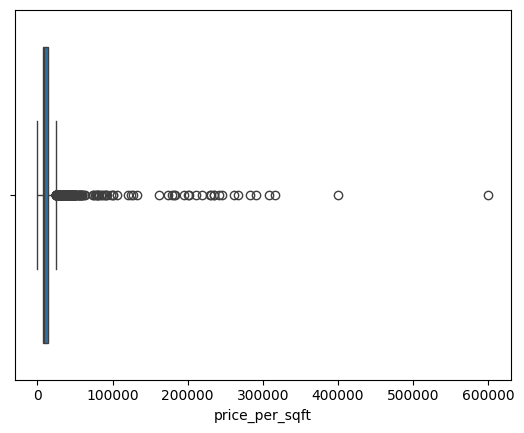

In [20]:
sns.boxplot(x=df['price_per_sqft'])


In [21]:
df[df['price_per_sqft']>50000]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
308,house,independent,sector 12,3.50,133079.0,263.0,Plot area 263(24.43 sq.m.)Built Up area: 4800 ...,8.0,8.0,3+,3.0,South-East,Relatively New,NaN,4800.0,4400.0,1,1,0,1,0,2,77
416,house,independent,sector 17,3.50,218750.0,160.0,Built Up area: 160 (14.86 sq.m.),6.0,6.0,3+,3.0,North-West,Undefined,NaN,160.0,NaN,0,0,0,0,0,0,0
437,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
491,house,independent,sector 105,0.55,98214.0,56.0,Built Up area: 56 (5.2 sq.m.),4.0,4.0,0,2.0,NaN,Undefined,NaN,56.0,NaN,0,0,0,0,0,0,0
553,house,independent,sector 4,0.61,100000.0,61.0,Plot area 61(5.67 sq.m.),2.0,2.0,2,2.0,South-East,Moderately Old,NaN,61.0,NaN,0,0,0,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75
3503,house,eros rosewood villas,sector 49,2.75,178571.0,154.0,Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...,3.0,3.0,1,2.0,North-West,Old Property,NaN,NaN,1650.0,0,0,0,0,1,1,80
3605,house,independent,sector 9,1.10,55000.0,200.0,Plot area 200(18.58 sq.m.),4.0,3.0,1,2.0,North-East,Old Property,NaN,200.0,NaN,0,0,0,0,0,0,0
3661,house,ansal api esencia,sector 67,1.85,74000.0,250.0,Carpet area: 250 (23.23 sq.m.),3.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,250.0,0,0,0,0,0,0,49


In [22]:
df = df[df['price_per_sqft'] <= 50000]


<Axes: xlabel='price_per_sqft'>

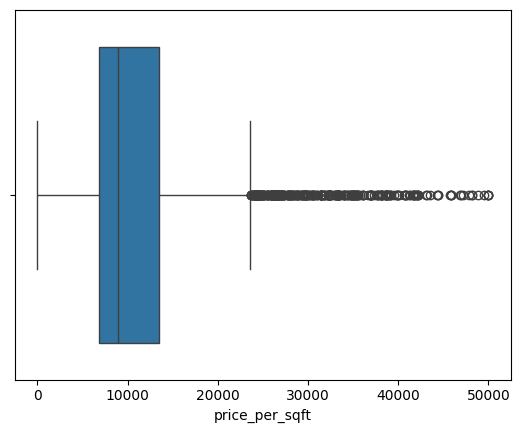

In [23]:
sns.boxplot(x=df['price_per_sqft'])


Area

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\3155724510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

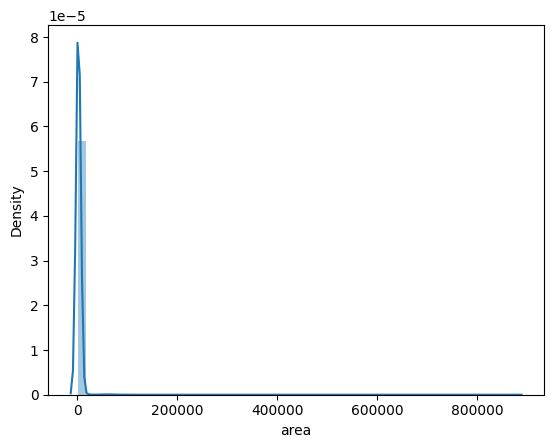

In [24]:
sns.distplot(df['area'])


<Axes: xlabel='area'>

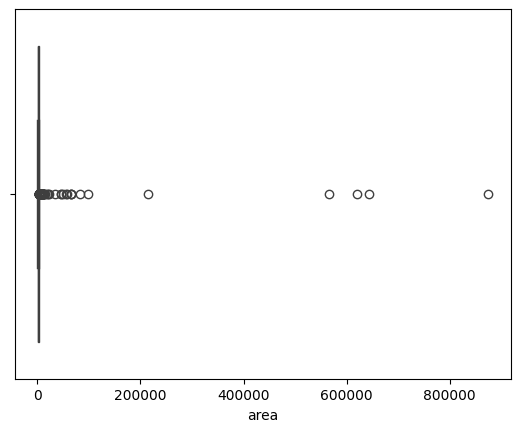

In [25]:
sns.boxplot(x=df['area'])


In [26]:
df['area'].describe()


count      3598.000000
mean       2926.910784
std       23364.099225
min          72.000000
25%        1251.250000
50%        1743.500000
75%        2308.750000
max      875000.000000
Name: area, dtype: float64

In [27]:
df[df['area'] > 100000]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
124,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
750,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1364,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
1608,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
2577,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65


In [28]:
df = df[df['area'] < 100000]


<Axes: xlabel='area'>

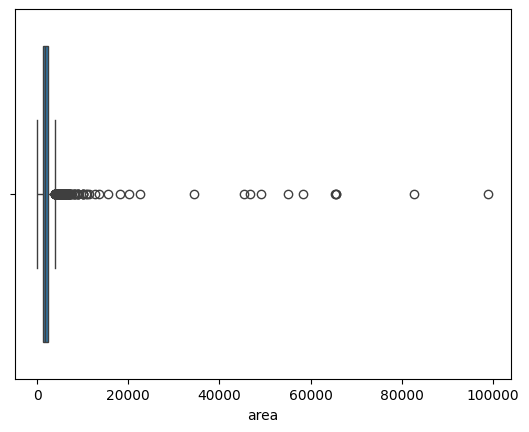

In [29]:
sns.boxplot(x=df['area'])


In [30]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2158,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
3110,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
3322,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
295,flat,rof ananda,sector 110,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1786,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1545,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
1171,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
2401,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
3462,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2288,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [32]:
missing_indices = [i for i in [818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471] if i not in df.index]
print("Missing indices:", missing_indices)


Missing indices: [1123]


In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2158,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
3110,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
3322,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
295,flat,rof ananda,sector 110,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1786,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1545,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
1171,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
2401,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
3462,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2288,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [34]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

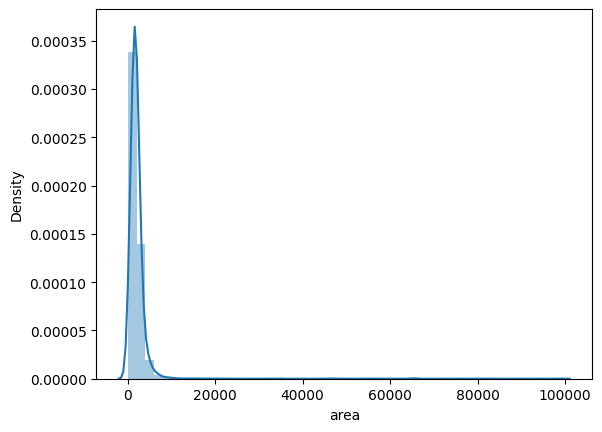

In [35]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

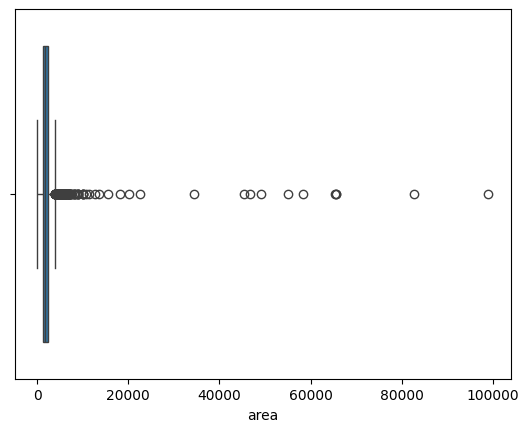

In [36]:
sns.boxplot(x=df['area'])

In [37]:
df['area'].describe()

count     3593.000000
mean      2119.113832
std       3630.482086
min         72.000000
25%       1251.000000
50%       1744.000000
75%       2302.000000
max      98978.000000
Name: area, dtype: float64

### Bedroom

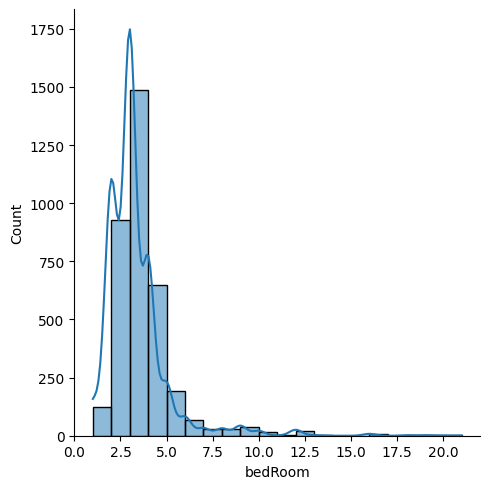

In [39]:
sns.displot(df['bedRoom'], kde=True, bins=20)
plt.show()


<Axes: xlabel='bedRoom'>

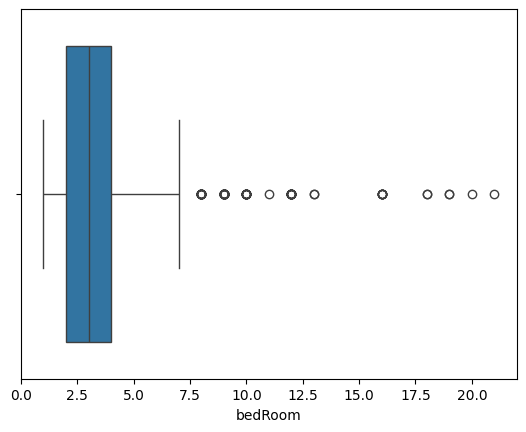

In [40]:
sns.boxplot(x=df['bedRoom'])

In [41]:
df['bedRoom'].describe()

count    3593.000000
mean        3.297523
std         1.771696
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [42]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
444,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
1278,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
652,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
2111,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
2146,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
2154,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
3594,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
1902,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20
1763,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0
1654,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


In [43]:
df = df[df['bedRoom'] <= 10]

In [44]:
df.shape

(3555, 23)

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

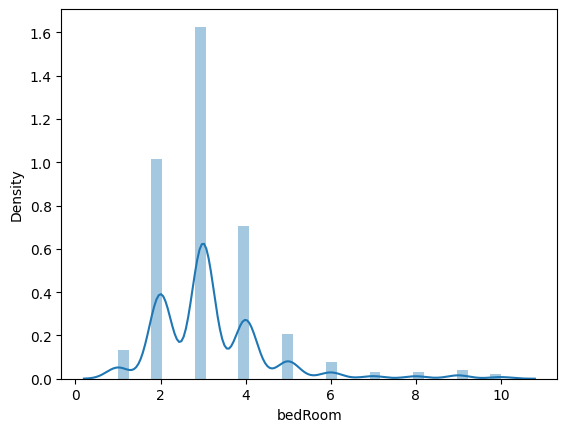

In [45]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

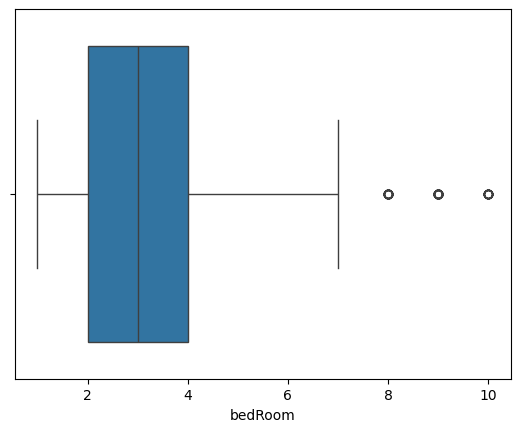

In [46]:
sns.boxplot(x=df['bedRoom'])

In [47]:
df['bedRoom'].describe()

count    3555.000000
mean        3.184248
std         1.369776
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom


C:\Users\shres\AppData\Local\Temp\ipykernel_28948\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

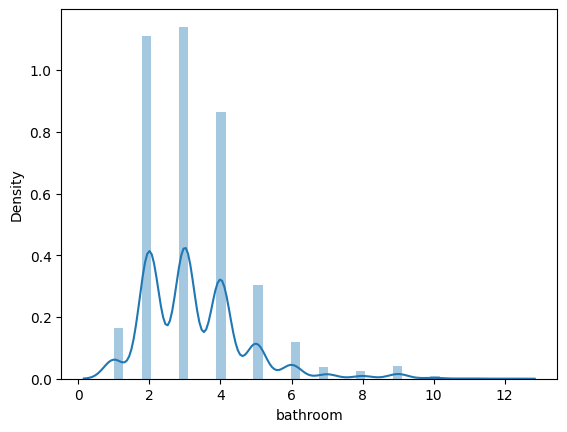

In [48]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

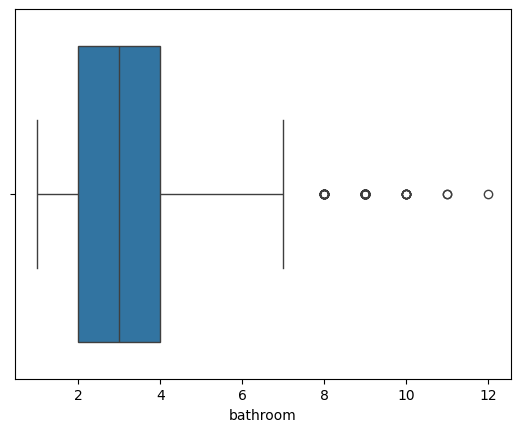

In [49]:
sns.boxplot(x=df['bathroom'])

In [50]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1583,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
805,house,independent,sector 24,11.00,28898.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39
1489,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [51]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up...,2.0,2.0,3,3.0,East,New Property,1361.0,1089.0,705.0,0,0,0,1,0,0,174
1,flat,ramprastha skyz,sector 37d,1.10,6376.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,7.0,East,Undefined,1725.0,NaN,NaN,0,0,0,0,0,0,109
2,flat,signature global solera,sector 107,0.28,5725.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,6.0,West,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45
3,flat,corona optus,sector 37c,1.20,6916.0,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up...,3.0,4.0,3,8.0,South-West,Relatively New,1735.0,1635.0,1535.0,0,0,0,0,0,0,149
4,flat,puri emerald bay,sector 104,2.30,9387.0,2450.0,Super Built up area 2450(227.61 sq.m.),3.0,4.0,3+,10.0,North-East,Moderately Old,2450.0,NaN,NaN,0,1,0,0,0,0,101


### super built up area

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

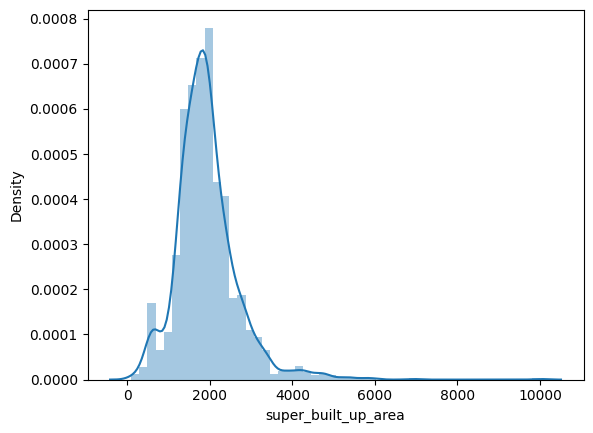

In [52]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

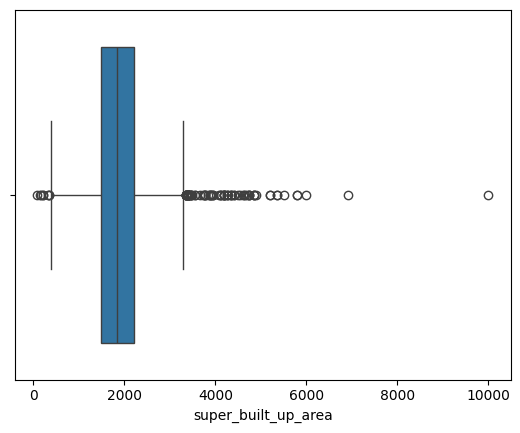

In [53]:
sns.boxplot(x=df['super_built_up_area'])

In [54]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [55]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2917,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
3763,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


### built up area

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

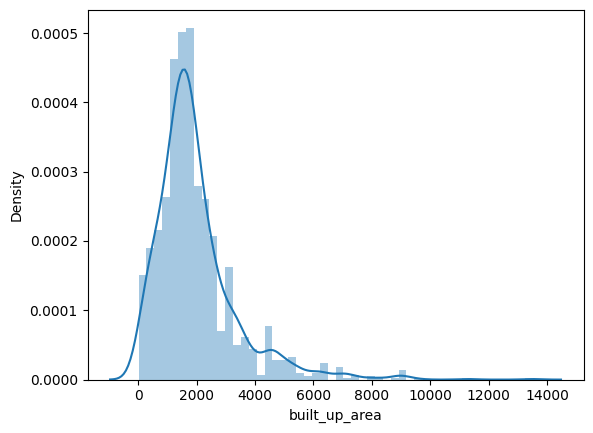

In [56]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

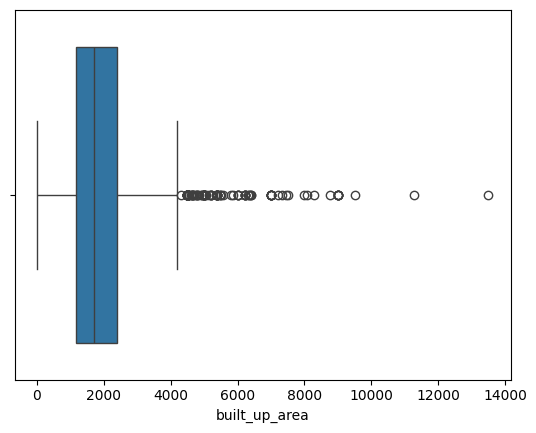

In [57]:
sns.boxplot(x=df['built_up_area'])

In [58]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
884,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,0,0
1600,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


### carpet area

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

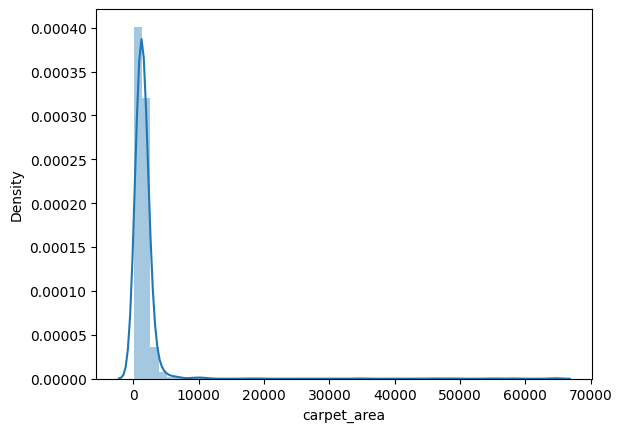

In [59]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

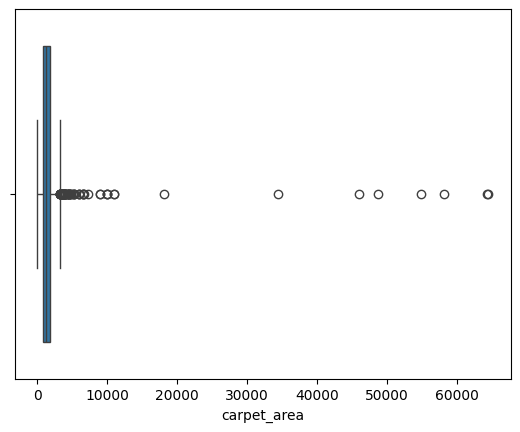

In [60]:
sns.boxplot(x=df['carpet_area'])

In [61]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,flat,m3m golfestate,sector 65,13.20,12000.0,1035.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
295,flat,rof ananda,sector 110,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
1171,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
1545,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2158,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
2288,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,0,33
2401,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,0,37
2927,flat,rof ananda,sector 110,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
3127,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1,0,0,1,1,1,44
3322,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,0,15


In [62]:
df.loc[2131,'carpet_area'] = 1812

In [63]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,flat,m3m golfestate,sector 65,13.20,12000.0,1035.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
295,flat,rof ananda,sector 110,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
1171,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
1545,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2158,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
2288,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,0,33
2401,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,0,37
2927,flat,rof ananda,sector 110,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
3127,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1,0,0,1,1,1,44
3322,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,0,15


In [64]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up...,2.0,2.0,3,3.0,East,New Property,1361.0,1089.0,705.0,0,0,0,1,0,0,174
1,flat,ramprastha skyz,sector 37d,1.10,6376.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,7.0,East,Undefined,1725.0,NaN,NaN,0,0,0,0,0,0,109
2,flat,signature global solera,sector 107,0.28,5725.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,6.0,West,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45
3,flat,corona optus,sector 37c,1.20,6916.0,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up...,3.0,4.0,3,8.0,South-West,Relatively New,1735.0,1635.0,1535.0,0,0,0,0,0,0,149
4,flat,puri emerald bay,sector 104,2.30,9387.0,2450.0,Super Built up area 2450(227.61 sq.m.),3.0,4.0,3+,10.0,North-East,Moderately Old,2450.0,NaN,NaN,0,1,0,0,0,0,101


C:\Users\shres\AppData\Local\Temp\ipykernel_28948\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

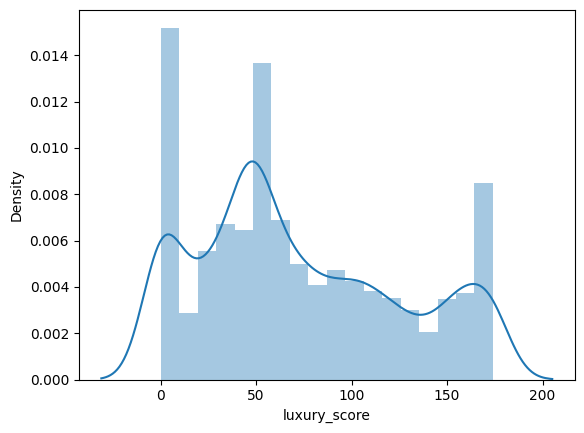

In [65]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

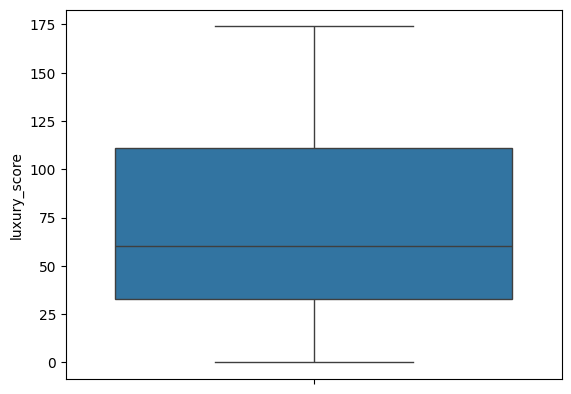

In [66]:
sns.boxplot(df['luxury_score'])

In [67]:
df.shape

(3555, 23)

In [68]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

C:\Users\shres\AppData\Local\Temp\ipykernel_28948\3958460563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round((df['price']*10000000)/df['area'])


In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up...,2.0,2.0,3,3.0,East,New Property,1361.0,1089.0,705.0,0,0,0,1,0,0,174
1,flat,ramprastha skyz,sector 37d,1.10,6377.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,7.0,East,Undefined,1725.0,NaN,NaN,0,0,0,0,0,0,109
2,flat,signature global solera,sector 107,0.28,5726.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,6.0,West,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45
3,flat,corona optus,sector 37c,1.20,6916.0,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up...,3.0,4.0,3,8.0,South-West,Relatively New,1735.0,1635.0,1535.0,0,0,0,0,0,0,149
4,flat,puri emerald bay,sector 104,2.30,9388.0,2450.0,Super Built up area 2450(227.61 sq.m.),3.0,4.0,3+,10.0,North-East,Moderately Old,2450.0,NaN,NaN,0,1,0,0,0,0,101


C:\Users\shres\AppData\Local\Temp\ipykernel_28948\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

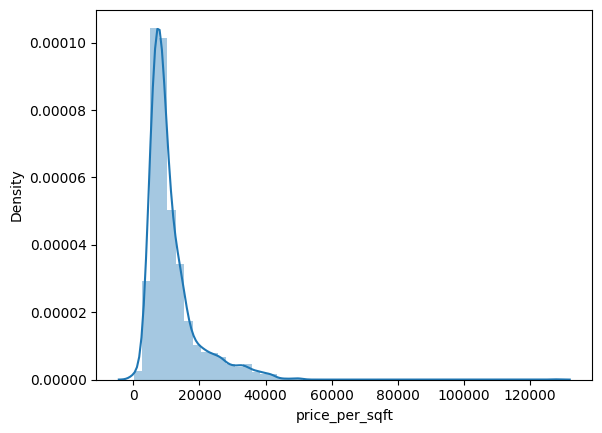

In [70]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

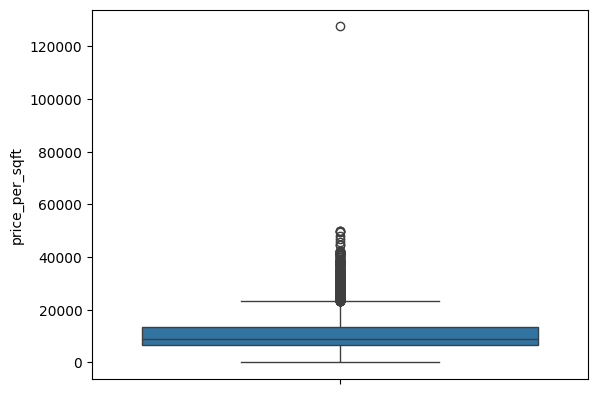

In [71]:
sns.boxplot(df['price_per_sqft'])

In [72]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,flat,m3m golfestate,sector 65,13.20,127536.0,1035.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.000000,0,1,0,0,0,0,60
671,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.000000,0,0,0,0,1,1,44
779,house,independent,sector 105,0.50,50000.0,100.0,Built Up area: 100 (9.29 sq.m.),2.0,2.0,0,1.0,NaN,Undefined,NaN,100.0,NaN,0,0,0,0,0,0,0
1052,house,independent,sector 43,9.50,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.000000,0,1,0,1,0,1,88
1343,house,independent,sector 105,9.90,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.000000,0,0,0,0,0,0,0
1496,house,independent,sector 26,19.00,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
1611,flat,breez global hill view,sohna road,2.60,46931.0,554.0,Carpet area: 554.16 (51.48 sq.m.),2.0,2.0,2,6.0,NaN,New Property,NaN,NaN,554.125572,0,0,0,0,0,0,42
2267,flat,lig flat,sector 40,1.50,50000.0,300.0,Built Up area: 300 (27.87 sq.m.),1.0,1.0,0,0.0,NaN,Undefined,NaN,300.0,NaN,0,0,0,0,0,0,0
2459,house,independent,sector 28,12.00,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
2566,house,shree krishna homes,sector 104,0.48,50000.0,96.0,Plot area 80(7.43 sq.m.)Built Up area: 795 sq....,2.0,2.0,1,1.0,North-East,New Property,NaN,795.0,720.000000,1,0,0,1,1,0,44


In [73]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

198.056

In [74]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
52,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2.0,2.0,2,1.0,NaN,Undefined,NaN,NaN,33.0,0,0,0,0,0,0,0
70,house,independent,sector 4,0.65,11111.0,585.0,Plot area 65(54.35 sq.m.),4.0,2.0,2,NaN,NaN,Moderately Old,NaN,585.0,NaN,0,0,0,0,0,0,0
90,house,independent,sector 105,0.60,13333.0,450.0,Built Up area: 450 (41.81 sq.m.),3.0,3.0,0,3.0,NaN,Undefined,NaN,450.0,NaN,0,0,0,0,0,0,0
100,house,independent,sector 4,0.80,11852.0,675.0,Plot area 75(62.71 sq.m.),5.0,3.0,1,2.0,NaN,Moderately Old,NaN,675.0,NaN,0,0,0,0,0,0,0
194,house,independent,sector 24,4.50,33333.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 160 ...,10.0,8.0,3+,4.0,East,Relatively New,NaN,160.0,150.0,0,1,1,0,0,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,house,dlf city plots phase 3,sector 24,1.60,29630.0,540.0,Plot area 540(50.17 sq.m.)Built Up area: 540 s...,8.0,5.0,3+,4.0,East,Old Property,NaN,540.0,500.0,0,0,0,0,0,0,8
3585,house,sushant lok 1 builder floors,sector 43,1.65,30556.0,540.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4.0,4.0,3+,4.0,West,Moderately Old,NaN,540.0,500.0,0,0,0,0,1,2,49
3625,house,bhawani enclave,sector 12,0.42,8235.0,510.0,Plot area 565(52.49 sq.m.)Carpet area: 510 sq....,3.0,3.0,0,2.0,East,New Property,NaN,NaN,510.0,0,0,0,1,0,0,0
3626,house,prem kunj,sohna road road,0.50,7407.0,675.0,Plot area 675(62.71 sq.m.)Built Up area: 725 s...,5.0,4.0,3,3.0,South-West,Relatively New,NaN,725.0,675.0,0,0,0,1,0,0,22


In [83]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

259.5

In [84]:
df[df['area']/df['bedRoom']<250].shape

(194, 23)

In [92]:
filtered_df = df[df['area'] / df['bedRoom'] < 250].copy()  # Filter and create a copy
filtered_df['area_room_ratio'] = filtered_df['area'] / filtered_df['bedRoom']  # New column

filtered_df.to_csv('filtered_data.csv', index=False)  # Save to CSV


In [ ]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)